In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [14]:
%matplotlib inline

# Basic Plot

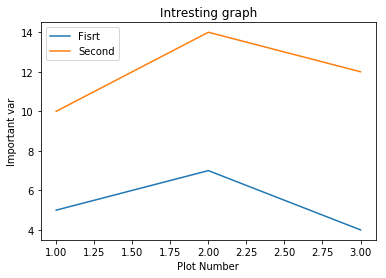

In [19]:
x = [1,2,3]
y = [5,7,4]

x2 = [1,2,3]
y2 = [10,14,12]
plt.plot(x,y, label='Fisrt')
plt.plot(x2,y2, label ='Second')
plt.xlabel('Plot Number')
plt.ylabel('Important var')
plt.title('Intresting graph')
plt.legend()
plt.show()

# Bar Graphs

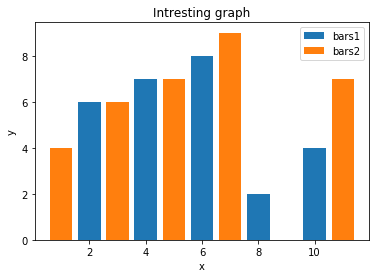

In [25]:
x= [2,4,6,8,10]
y= [6,7,8,2,4]

x2 = [1,3,5,7,9,11]
y2 = [4,6,7,9,0,7]

plt.bar(x,y, label="bars1")
plt.bar(x2,y2, label="bars2")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intresting graph')
plt.legend()
plt.show()

# Histogram

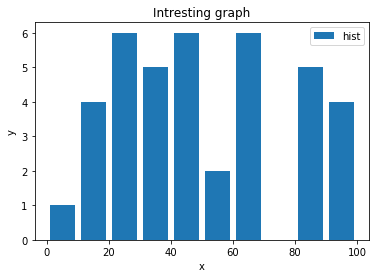

In [29]:
population_ages = [22,33,55,19,18,37,65,35,89,32,85,95,29,49,29,1,30,12,13,45,65,63,26,89,91,48,26,27,82,65,43,67,43,65,52,45,87,90,100]
#ids = [x for x in range(len(population_ages))]
bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(population_ages, bins, histtype='bar',rwidth=0.8, label='hist')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Intresting graph')
plt.legend()
plt.show()

# Scatter

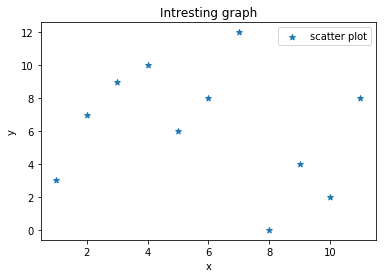

In [60]:
x=[1,2,3,4,5,6,7,8,9,10,11]
y=[3,7,9,10,6,8,12,0,4,2,8]

plt.scatter(x,y, label ='scatter plot', marker='*')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Intresting graph')
plt.legend()
plt.show()

# Stack Plots

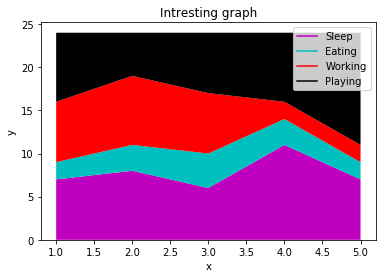

In [39]:
days=[1,2,3,4,5]

sleeping=[7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing=[8,5,7,8,13]


plt.plot([],[], color='m', label='Sleep')
plt.plot([],[], color='c', label='Eating')
plt.plot([],[], color='r', label='Working')
plt.plot([],[], color='k', label='Playing')

plt.stackplot(days, sleeping,eating,working,playing, colors=['m','c','r','k'])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Intresting graph')
plt.legend()
plt.show()

# Pie Charts

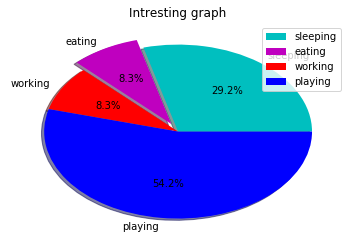

In [46]:
days=[1,2,3,4,5]

sleeping=[7,8,6,11,7]
eating = [2,3,4,3,2]
working = [7,8,7,2,2]
playing=[8,5,7,8,13]

Slices = [7,2,2,13]
activities = ['sleeping','eating','working','playing']
cols = ['c','m','r','b']

plt.pie(Slices, 
        labels = activities, 
        colors=cols, 
        shadow=True, 
        explode=(0,0.1,0,0), autopct='%1.1f%%')


plt.title('Intresting graph')
plt.legend()
plt.show()

# Loading Data from Files

In [47]:
import csv

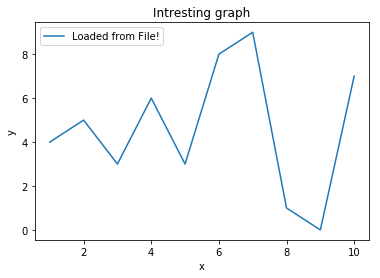

In [48]:
x =[]
y =[]

#Using the builtin CSV 
with open('example.txt','r',) as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(int(row[0]))#Appends each value into list -> X
        y.append(int(row[1]))#Appends each value into list -> Y
        
plt.plot(x,y, label='Random Values')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Loaded from File!')
plt.legend()
plt.show()

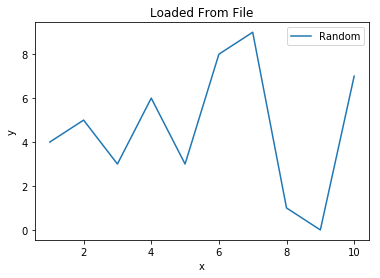

In [50]:
# Using the NUMPY 
x, y= np.loadtxt('example.txt', delimiter=',', unpack=True) 
#Loads each column into a list

plt.plot(x,y, label='Random')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Loaded From File')
plt.legend()
plt.show()

# Errorbar Plots

<Container object of 3 artists>

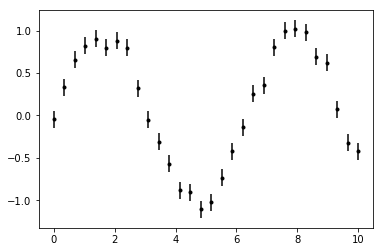

In [51]:
x = np.linspace(0, 10, 30)
dy = 0.1
y = np.random.normal(np.sin(x), dy)

plt.errorbar(x, y, dy, fmt='.k')

# Web Data

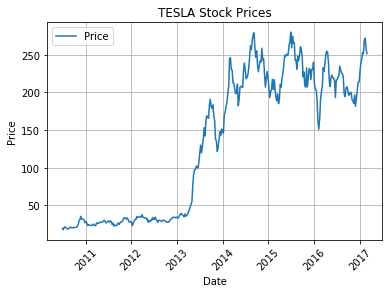

In [74]:
import urllib
import matplotlib.dates as mdates

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    ax1.plot_date(date, closep,'-', label='Price')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)#, color='g', linestyle='-', linewidth=5)
    #The above commented line can be used if we need to cutomize the grid.

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('TESLA Stock Prices')
    plt.legend()
    #plt.subplots_adjust(left=0.09,bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    #The Above lines add the padding. To the figure (this works when you are using basic IDLE)
    plt.show()


graph_data('TSLA')